In [2]:
## imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load dataset
charging_set = pd.read_csv("data/cleaned_charging_set.csv")

In [4]:
# look at dataset for feature selection
charging_set.head()

,id,kWhDelivered,siteID,spaceID,stationID,timezone,userID,connectionTime_date,connectionTime_time,disconnectTime_date,...,paymentRequired,requestedDeparture,UserID,WhPerMile_present,kWhRequested_present,milesRequested_present,minutesAvailable_present,modifiedAt_present,paymentRequired_present,requestedDeparture_present
0,5e23b149f9af8b5fe4b973cf,25.016,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,2020-01-02,13:08:54,2020-01-02,...,True,"Thu, 02 Jan 2020 20:51:54 GMT",1,1,1,1,1,1,1,1
1,5e23b149f9af8b5fe4b973d0,33.097,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,2020-01-02,13:36:50,2020-01-02,...,True,"Thu, 02 Jan 2020 23:31:50 GMT",1,1,1,1,1,1,1,1
2,5e23b149f9af8b5fe4b973d1,6.521,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,2020-01-02,13:56:35,2020-01-03,...,True,"Thu, 02 Jan 2020 14:56:35 GMT",1,1,1,1,1,1,1,1
3,5e23b149f9af8b5fe4b973d2,2.355,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,2020-01-02,13:59:58,2020-01-02,...,True,"Thu, 02 Jan 2020 15:04:58 GMT",1,1,1,1,1,1,1,1
4,5e23b149f9af8b5fe4b973d3,13.375,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,2020-01-02,14:00:01,2020-01-02,...,True,"Thu, 02 Jan 2020 22:24:01 GMT",1,1,1,1,1,1,1,1


In [12]:
charging_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          66450 non-null  object 
 1   kWhDelivered                66450 non-null  float64
 2   siteID                      66450 non-null  int64  
 3   spaceID                     66450 non-null  object 
 4   stationID                   66450 non-null  object 
 5   timezone                    66450 non-null  object 
 6   userID                      49187 non-null  float64
 7   connectionTime_date         66450 non-null  object 
 8   connectionTime_time         66450 non-null  object 
 9   disconnectTime_date         66450 non-null  object 
 10  disconnectTime_time         66450 non-null  object 
 11  doneChargingTime_date       62362 non-null  object 
 12  doneChargingTime_time       62362 non-null  object 
 13  connectionTime_year         664

In [2]:
#charging_set.loc[1]

In [59]:
# frop columns that are not suitable for data normalisation
cs_reduced = charging_set.drop(["UserID","userID", "id","spaceID","stationID","timezone","connectionTime_date","connectionTime_time","disconnectTime_date","disconnectTime_time","doneChargingTime_date","doneChargingTime_time","modifiedAt","paymentRequired","requestedDeparture"], axis=1)
cs_reduced.head()
X_noUserInputDropped = cs_reduced.dropna()
df_for_clustering = cs_reduced[["kWhDelivered","connectionTime_day","disconnectTime_day","chargingDuration"]]
df_for_clustering.head()

,kWhDelivered,connectionTime_day,disconnectTime_day,chargingDuration
0,25.016,2,2,6.039167
1,33.097,2,2,9.025278
2,6.521,2,3,10.713056
3,2.355,2,2,2.644722
4,13.375,2,2,8.144167


In [60]:
# normalise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_for_clustering)
Clustering_scaled_array = scaler.transform(df_for_clustering)
Clustering_scaled_df = pd.DataFrame(Clustering_scaled_array, columns=df_for_clustering.columns, index=df_for_clustering.index)
Clustering_scaled_df.head()

,kWhDelivered,connectionTime_day,disconnectTime_day,chargingDuration
0,1.282448,-1.566823,-1.576423,-0.052201
1,2.065892,-1.566823,-1.576423,0.562041
2,-0.510622,-1.566823,-1.461270,0.909216
3,-0.914511,-1.566823,-1.576423,-0.750436
4,0.153866,-1.566823,-1.576423,0.380797


In [61]:
from sklearn.cluster import KMeans

In [62]:

k_max = 50
df = df_for_clustering

In [63]:
clusters = []
losses = []

In [64]:
for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(Clustering_scaled_array)
    clusters.append(k+1)
    losses.append(model.inertia_)

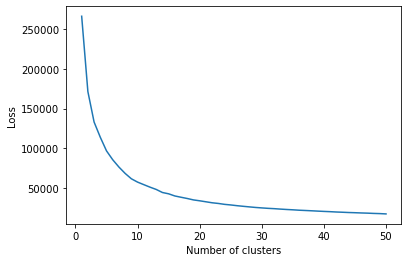

In [65]:
# plot loss in relation to cluster amount 
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 15.0)

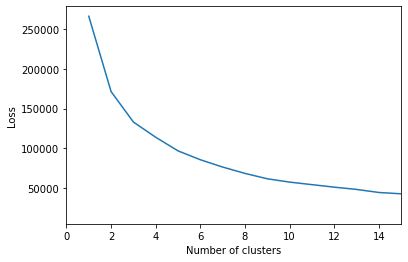

In [66]:
# zoom in 
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,15])

(0.0, 10.0)

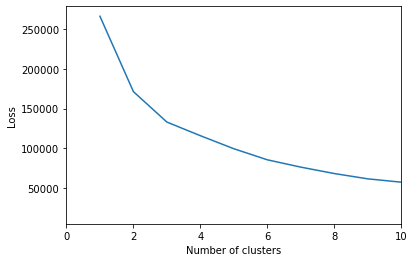

In [50]:
# zoom in again
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,10])

Sharpest fold at 2-6, therefore and appropriate cluster amount lies in that region. Let's pick 3 clusters for now

In [67]:
# refit algorithm
two_means = KMeans(n_clusters=3)
two_means.fit(Clustering_scaled_array)

# match records to clusters by calling predict
two_means.predict(Clustering_scaled_array)

array([0, 2, 0, ..., 1, 1, 1], dtype=int32)

/var/folders/2p/xvrd9yr13yb4vz2jsw9pykbh0000gn/T/ipykernel_24063/1956479517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["two"] = two_means.predict(Clustering_scaled_array)
/var/folders/2p/xvrd9yr13yb4vz2jsw9pykbh0000gn/T/ipykernel_24063/1956479517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["two"] = df["two"].apply(lambda x: numbers[x])


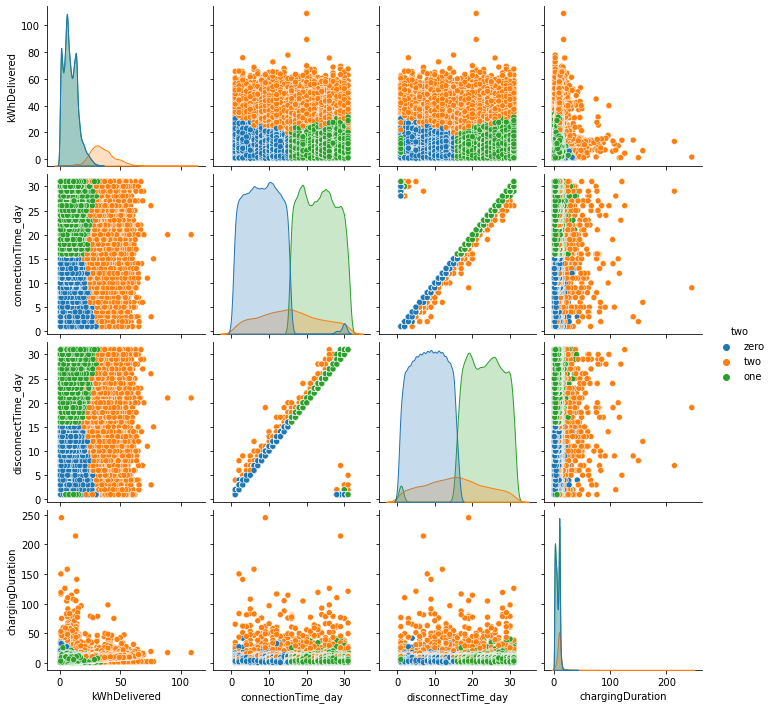

In [68]:
numbers = ["zero", "one", "two", "three"]
df["two"] = two_means.predict(Clustering_scaled_array)
df["two"] = df["two"].apply(lambda x: numbers[x])
sns.pairplot(data=df, hue="two")